 # Data  description


# this dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

## starting by importing our libraries

In [198]:
import pandas as pd #For DataFrames
import numpy as np #Mathmatical Operations
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
plt.style.use('seaborn')
sns.set()


In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [199]:
df.info()
# we can see that there is no null values 
# all the data are numeric so they are ready to be loaded into a machine model 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [201]:
# to make sure again 
df.isnull().sum()
# great we are ready to go ^^ 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# lets visualize our data to understand it better and do some analysing 


In [ ]:
# the data is all numeric (continous) so the histogram the way to go here 
#plus we dont want to compare them we just need to unsersatnd them 
# we will plot our cloumns one at time(not going to use supplo) to analyise it bettwer 

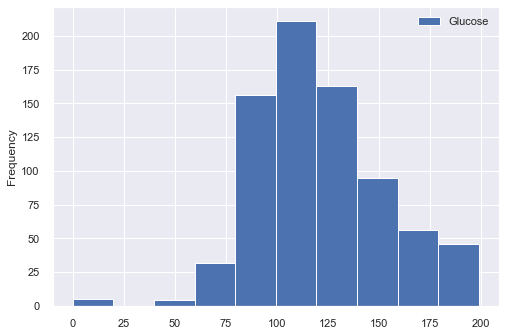

In [202]:
df.plot(kind="hist",y='Glucose')
# the distribution is bell shaped thats mean is normal  distribution
# we could see that approximately 115 Glucose Rate is the most frequent one

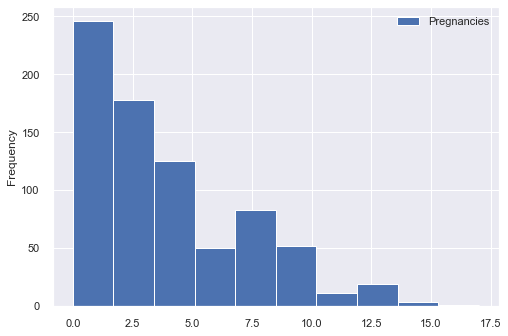

In [203]:
df.plot(kind="hist",y='Pregnancies')
# the distribution is right skewed distribution

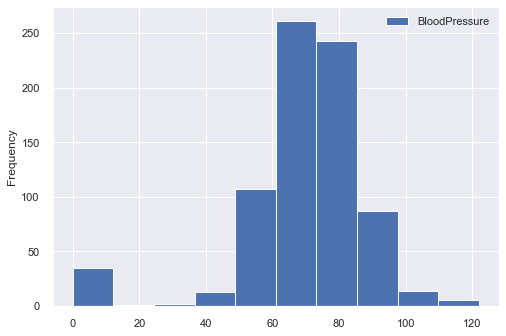

In [205]:
df.plot(kind="hist",y='BloodPressure')
# the distribution is roughly a normal distribution
# the most frequent BloodPressure rate is approximately around 68

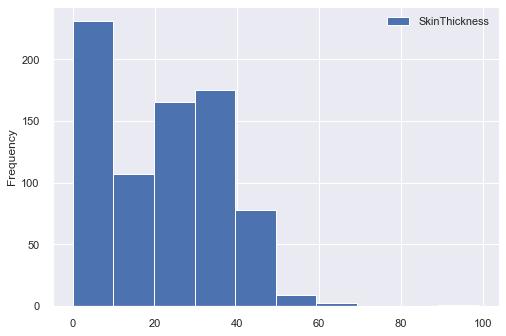

In [206]:
df.plot(kind="hist",y='SkinThickness')
# the distribution is roughly right skewed distribution
# the most frequrnt rate is around 10 

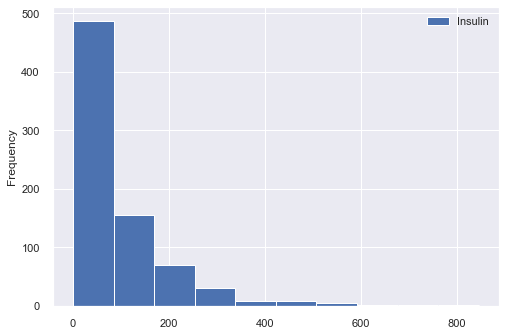

In [207]:
df.plot(kind="hist",y='Insulin')
# the distribution is right skewed distribution
# the most frequrnt rate is around 90:100 

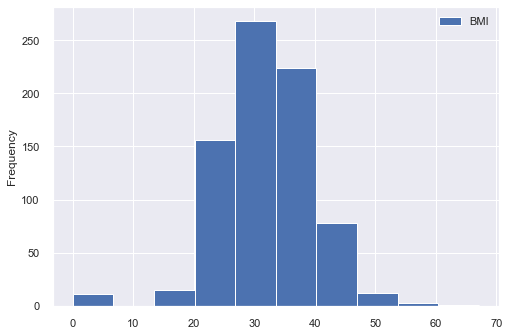

In [208]:
df.plot(kind="hist",y='BMI')
# the distribution is roughly a normal distribution
# the most frequent BIM rate is around 30

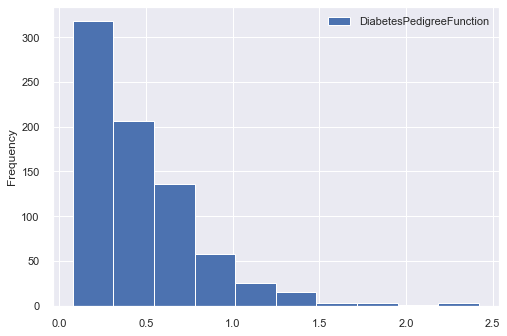

In [209]:
df.plot(kind="hist",y='DiabetesPedigreeFunction')
# the distribution is right skewed distribution
# the most frequrnt rate is around .25 

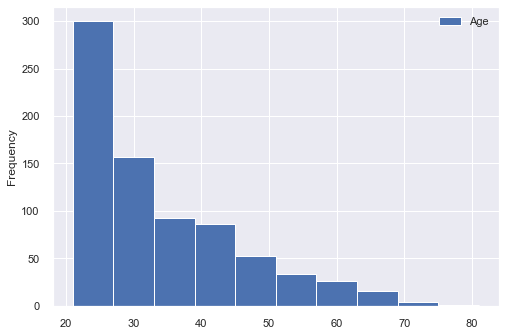

In [210]:
df.plot(kind="hist",y='Age')
# the distribution is right skewed distribution
# the most frequrnt age is around 25

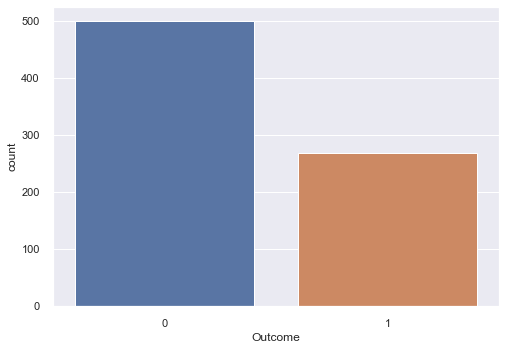

In [212]:
# we will visulaize the outcome cloumn to figure out is the pepole diagnosed with diabetes more or less 
sns.countplot('Outcome',data=df)
# we could see that the pepole diagnosed with diabetes are approximately around 270
# and People do not have diabetes are more than the other groub 

# lest go to the next phase of classify our data 

## we are going to use the KNN Classifier , to use it we need to select some columns from our data set and make them our traning set 

In [ ]:
Glucose=df['Glucose']
BloodPressure=df['BloodPressure']
Insulin=df['Insulin']
BMI=df['BMI'] ## it rises the acuuracy
DiabetesPedigreeFunction=df['DiabetesPedigreeFunction']

## as we work on a KNN Classifier ,which a supervised machine learing algorithm that is mean that in our data set we already have the target/label cloumn thats tell us for which class a specific observation belong

In [ ]:
label=df['Outcome']

## we select our feature cloumns ( i already tried diffrent combinations of features and this what gives me the highest  accuracy ) , lets zip them 


In [ ]:
features=list(zip(BloodPressure,Insulin,DiabetesPedigreeFunction,Glucose,BMI))

## lets split our data into train and test sets by using the  train_test_split modul

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.3) # 70% training and 30% test

## now, lets import the KNeighborsClassifier module and create KNN classifier object by passing argument number of neighbors in KNeighborsClassifier() function.Then, we fit our model on the train set using fit() and perform prediction on the test set using predict().

In [195]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)# it gives us the hightest accuracy 

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

## then we calculate the Classifier accuracy by using confuaion matrix 

In [196]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


# DONE

In [92]:
### testing the feature num and k you could skip reading  that :D
#5>>0.6536796536796536
#+ Glucose,5 >>0.70995670995671
#             0.70995670995671
#+ Glucose,3 >> 0.7272727272727273
#+BMI ,3>>0.696969696969697
#++BMI,4>> 0.7402597402597403
#++BMI,5>> 0.7575757575757576
#++BMI,6>>0.7445887445887446
##++BMI,7>> 0.7519047619047619 @@@@@@@@
## +age ,7 >>0.7272727272727273 :.73,.72 and still drops down >>> so age is a bad feature 
## skin ,3 >> 0.6753246753246753 ,11>74 , 12>>71 >>> so adding skin is bad too
##--Glucose,12>>67 ,9>>66,6>>64,5>>66 >> so removing glucose drops the acuuracy down 
